In [120]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
def conv1d(g, h, mode = "full"):
    convgh = []
    n = len(g)
    m = len(h)
    for i in range(0, n+m - 1):
        conv = 0
        for j in range(m):
            if(i-j > -1 and i-j < n):
                conv += g[i-j]* h[j]
        convgh += [conv]
    if mode == "full":
        return convgh
    if mode == "valid":
        leng = max(n, m)
        return convgh[leng//2: n+m-1 - leng//2]
    if mode == "same":
        leng = min(n, m)
        return convgh[leng//2: n+m-1-leng//2]

In [173]:
def corr1d(g, h, mode = "full"):
    corrgh = []
    n = len(g)
    m = len(h)
    for i in range(0, len(g) + len(h) - 1):
        corr = 0
        for j in range(len(h)):
            if(i-j > -1 and i-j < len(g) ):
                corr += g[i-j]* h[len(h)-j-1]
        corrgh += [corr]
    if mode == "full":
            return corrgh
    if mode == "valid":
        leng = max(n, m)
        return corrgh[leng//2: n+m-1 - leng//2]
    if mode == "same":
        leng = min(n, m)
        return corrgh[leng//2: n+m-1-leng//2]

In [222]:
def plot(g, h, filtered, title):
    plt.subplot(131)
    plt.scatter(np.arange(len(g)), g)
    plt.subplot(132)
    plt.scatter(np.arange(len(h)), h)
    plt.subplot(133)
    plt.scatter(np.arange(len(filtered)), filtered)
    plt.subplots_adjust(right = 2, wspace=1.5, hspace=3)
    plt.title(title)
    plt.show()

In [213]:
def conv2d(g, h, mode = "full", lenh = 2):
    if lenh == 1:
        for i in range(g.shape[0]):
            convgh += [conv1d(g[i], h, mode=mode)]
        return convgh
    else:
        if mode == "zero-padding":
            for i in range(g.shape[0]):
                for j in range(g.shape[1]):
                        pass

In [214]:
def corr2d(g, h, mode):
    pass

# Entre com os valores de g(t) e h(t) 

In [216]:
g = [1, 2, 3, 2, 1]

In [215]:
h = [2, 2, 2]

## Correlação goh e hog

In [217]:
corrgh = corr1d(g, h)
corrhg = corr1d(h, g)

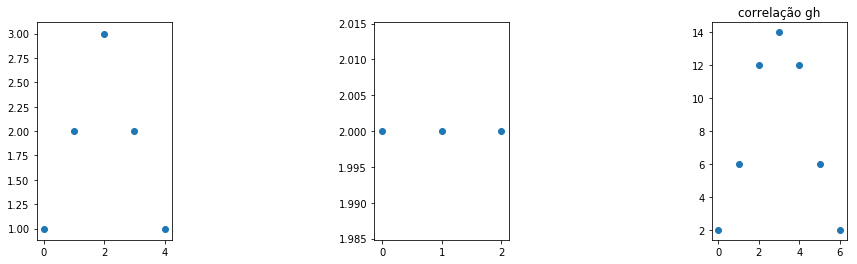

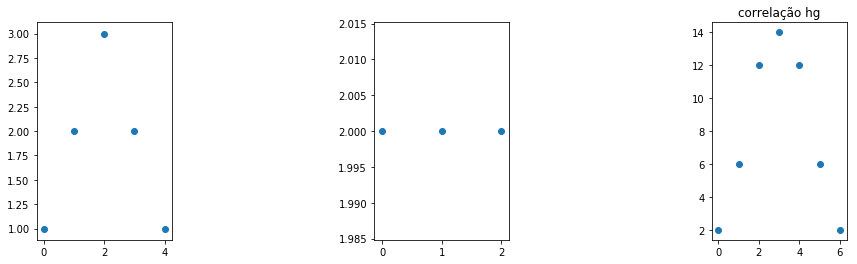

In [223]:
plot(g, h, corrgh, "correlação gh")
plot(g, h, corrhg, "correlação hg")

## Convolução g \* h e h \* g

In [219]:
convgh = conv1d(g, h)
convhg = conv1d(h, g)

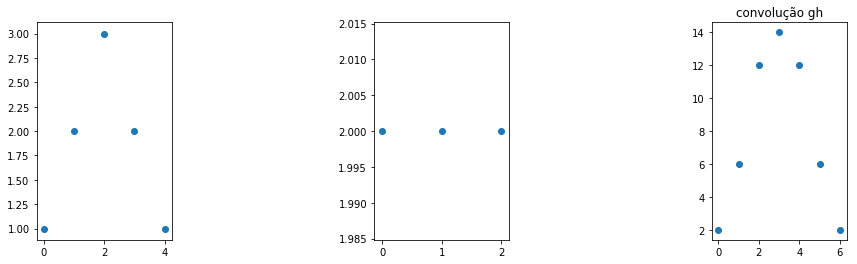

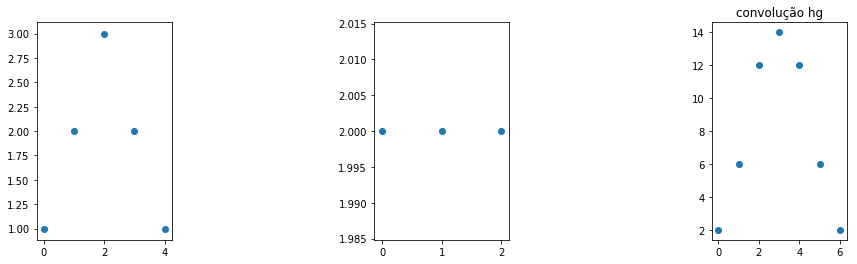

In [224]:
plot(g, h, convgh, "convolução gh")
plot(g, h, convhg, "convolução hg")

### Testes

In [226]:
def testing(g, h, mode = "full"):
    corrgh = corr1d(g, h, mode)
    corrhg = corr1d(h, g, mode)
    plot(g, h, corrgh, "correlação gh")
    plot(g, h, corrhg, "correlação hg")
    convgh = conv1d(g, h, mode)
    convhg = conv1d(h, g, mode)
    plot(g, h, convgh, "convolução gh")
    plot(g, h, convhg, "convolução hg")
    

### g e h simétricas (par)

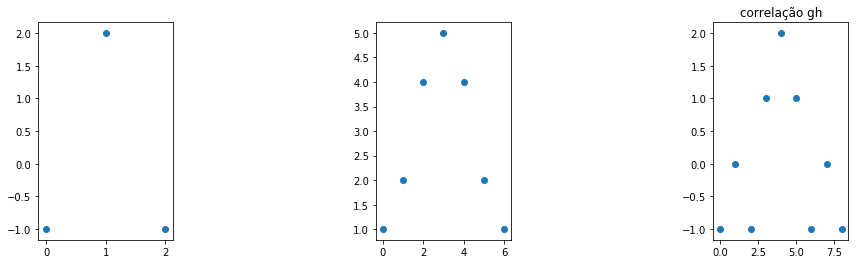

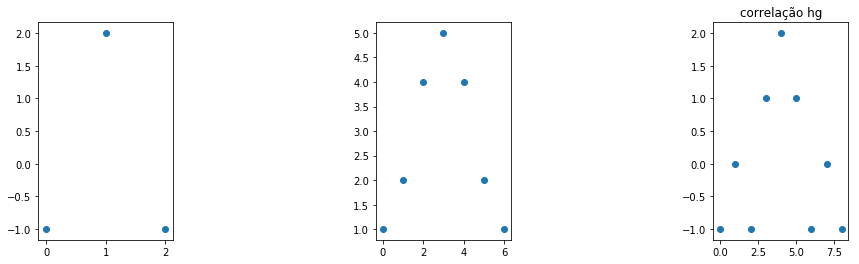

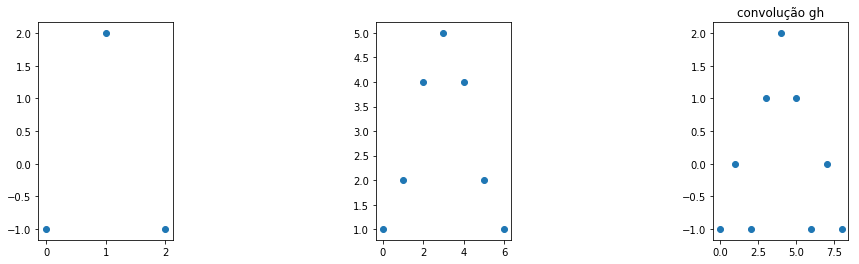

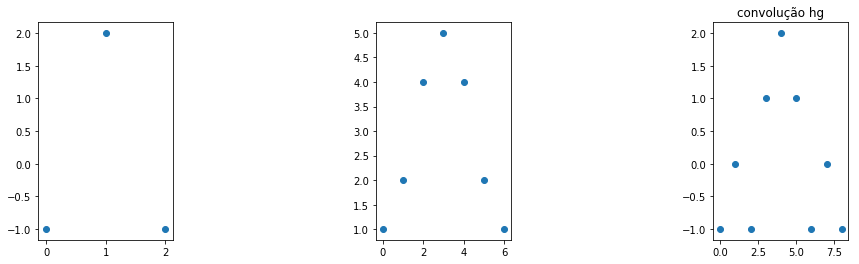

In [228]:
g = [-1, 2, -1]
h = [1, 2, 4, 5, 4, 2, 1]
testing(g, h)

### Apenas uma das duas funções é simétrica (par)

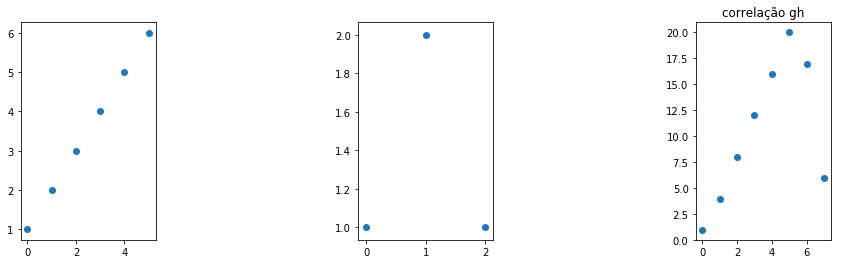

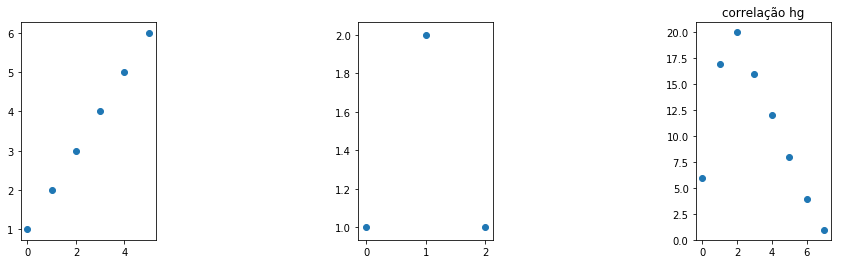

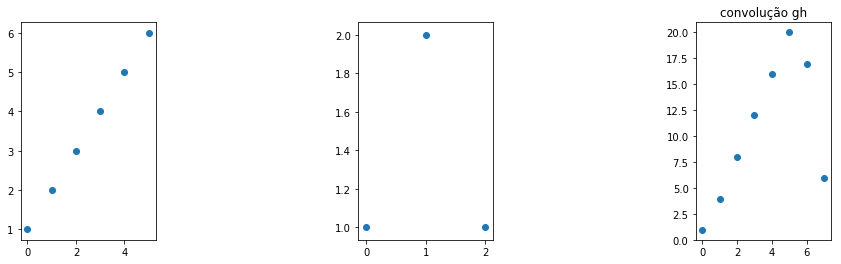

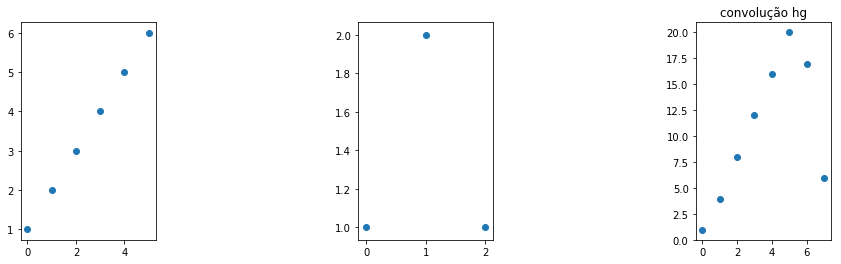

In [230]:
g = [1, 2, 3, 4, 5, 6]
h = [1, 2, 1]
testing(g, h)

### Nenhuma das duas é simétrica

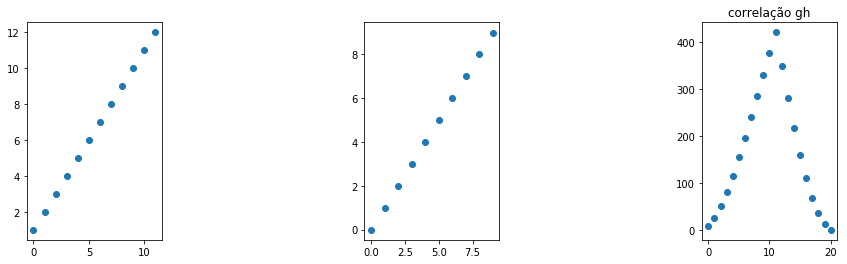

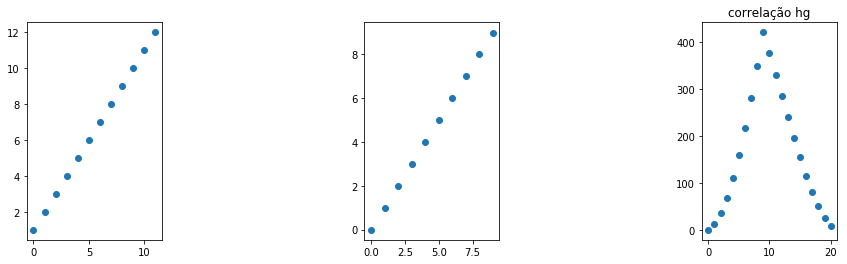

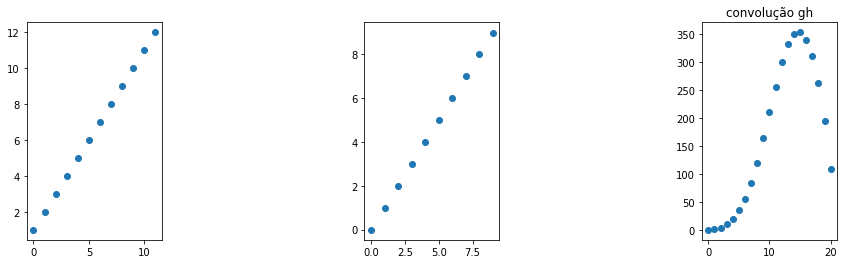

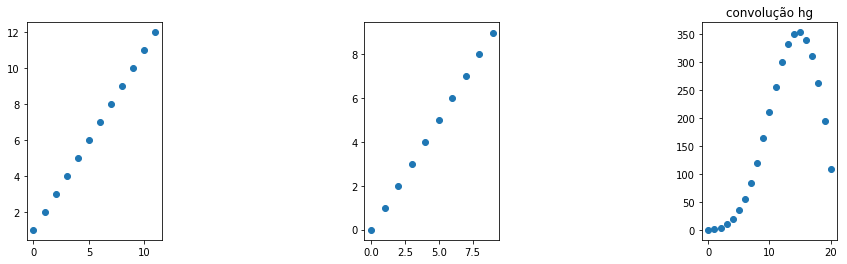

In [232]:
g = np.arange(1, 13)
h = np.arange(10)
testing(g, h)

Quando os filtros são ambos simétricos, temos que goh=hog=g\*h=h\*g.
Quando apenas um deles é, por exemplo h, goh = g\*h = h\*g
Quando nenhum é, não temos garantias de igualdade, apenas que h\*g = g\*h, pois trata-se de uma propriedade da convolução.
Além disso, é fácil ver que a correlação apresenta ponto de máximo, onde os filtros são mais semelhantes. Além disso, se os filtros tiverem apenas valores positivos, o máximo será atingido em algum ponto em que os filtros possuem  overlap total.